In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
2.0.0-alpha0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


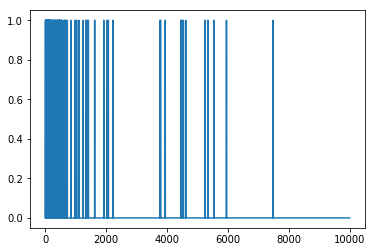

In [4]:
plt.plot(train_data[0])


In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 61s - loss: 0.4459 - accuracy: 0.8183 - binary_crossentropy: 0.4459 - val_loss: 0.3165 - val_accuracy: 0.8812 - val_binary_crossentropy: 0.3165
Epoch 2/20
25000/25000 - 36s - loss: 0.2350 - accuracy: 0.9153 - binary_crossentropy: 0.2350 - val_loss: 0.2837 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2837
Epoch 3/20
25000/25000 - 9s - loss: 0.1745 - accuracy: 0.9390 - binary_crossentropy: 0.1745 - val_loss: 0.2959 - val_accuracy: 0.8818 - val_binary_crossentropy: 0.2959
Epoch 4/20
25000/25000 - 5s - loss: 0.1416 - accuracy: 0.9518 - binary_crossentropy: 0.1416 - val_loss: 0.3356 - val_accuracy: 0.8703 - val_binary_crossentropy: 0.3356
Epoch 5/20
25000/25000 - 5s - loss: 0.1163 - accuracy: 0.9614 - binary_crossentropy: 0.1163 - val_loss: 0.3461 - val_accuracy: 0.8731 - val_binary_crossentropy: 0.3461
Epoch 6/20
25000/25000 - 5s - loss: 0.0949 - accuracy: 0.9713 - binary_crossentropy: 0.0949 - val_loss: 0.37

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 101s - loss: 0.6051 - accuracy: 0.6714 - binary_crossentropy: 0.6051 - val_loss: 0.5358 - val_accuracy: 0.7637 - val_binary_crossentropy: 0.5358
Epoch 2/20
25000/25000 - 40s - loss: 0.4854 - accuracy: 0.8480 - binary_crossentropy: 0.4854 - val_loss: 0.4867 - val_accuracy: 0.8325 - val_binary_crossentropy: 0.4867
Epoch 3/20
25000/25000 - 8s - loss: 0.4362 - accuracy: 0.8953 - binary_crossentropy: 0.4362 - val_loss: 0.4656 - val_accuracy: 0.8492 - val_binary_crossentropy: 0.4656
Epoch 4/20
25000/25000 - 4s - loss: 0.4030 - accuracy: 0.9175 - binary_crossentropy: 0.4030 - val_loss: 0.4489 - val_accuracy: 0.8680 - val_binary_crossentropy: 0.4489
Epoch 5/20
25000/25000 - 4s - loss: 0.3779 - accuracy: 0.9335 - binary_crossentropy: 0.3779 - val_loss: 0.4532 - val_accuracy: 0.8549 - val_binary_crossentropy: 0.4532
Epoch 6/20
25000/25000 - 4s - loss: 0.3550 - accuracy: 0.9448 - binary_crossentropy: 0.3550 - val_loss: 0.4

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 61s - loss: 0.3558 - accuracy: 0.8480 - binary_crossentropy: 0.3558 - val_loss: 0.3346 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3346
Epoch 2/20
25000/25000 - 42s - loss: 0.1483 - accuracy: 0.9468 - binary_crossentropy: 0.1483 - val_loss: 0.3296 - val_accuracy: 0.8744 - val_binary_crossentropy: 0.3296
Epoch 3/20
25000/25000 - 57s - loss: 0.0493 - accuracy: 0.9855 - binary_crossentropy: 0.0493 - val_loss: 0.4369 - val_accuracy: 0.8694 - val_binary_crossentropy: 0.4369
Epoch 4/20
25000/25000 - 36s - loss: 0.0073 - accuracy: 0.9987 - binary_crossentropy: 0.0073 - val_loss: 0.5823 - val_accuracy: 0.8689 - val_binary_crossentropy: 0.5823
Epoch 5/20
25000/25000 - 26s - loss: 7.7382e-04 - accuracy: 1.0000 - binary_crossentropy: 7.7382e-04 - val_loss: 0.6790 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.6790
Epoch 6/20
25000/25000 - 26s - loss: 2.2855e-04 - accuracy: 1.0000 - binary_crossentropy: 2.2855e

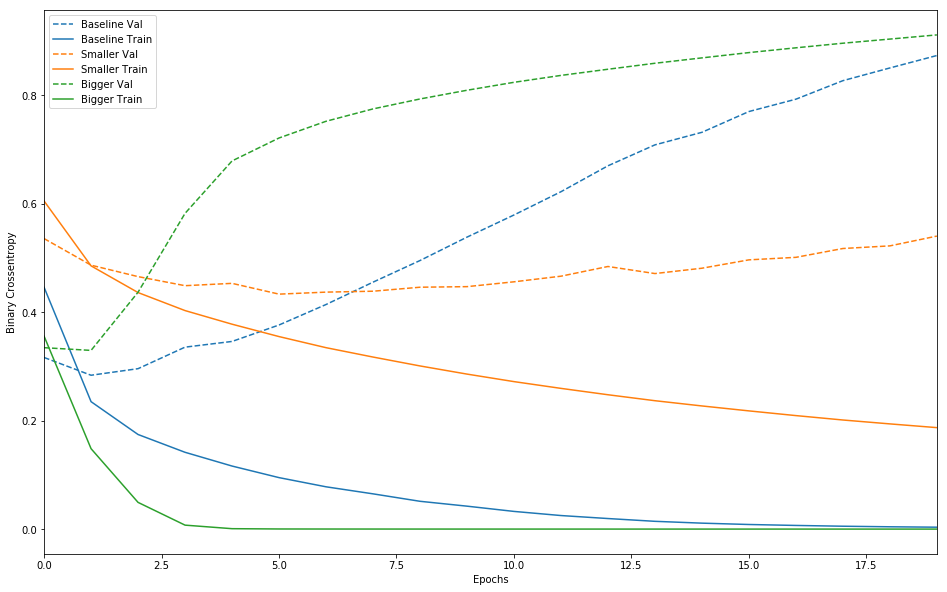

In [11]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 85s - loss: 0.5362 - accuracy: 0.7998 - binary_crossentropy: 0.4972 - val_loss: 0.3865 - val_accuracy: 0.8742 - val_binary_crossentropy: 0.3461
Epoch 2/20
25000/25000 - 40s - loss: 0.3089 - accuracy: 0.9063 - binary_crossentropy: 0.2640 - val_loss: 0.3346 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2863
Epoch 3/20
25000/25000 - 27s - loss: 0.2544 - accuracy: 0.9285 - binary_crossentropy: 0.2035 - val_loss: 0.3355 - val_accuracy: 0.8857 - val_binary_crossentropy: 0.2830
Epoch 4/20
25000/25000 - 5s - loss: 0.2305 - accuracy: 0.9388 - binary_crossentropy: 0.1762 - val_loss: 0.3491 - val_accuracy: 0.8818 - val_binary_crossentropy: 0.2935
Epoch 5/20
25000/25000 - 5s - loss: 0.2144 - accuracy: 0.9467 - binary_crossentropy: 0.1577 - val_loss: 0.3614 - val_accuracy: 0.8779 - val_binary_crossentropy: 0.3039
Epoch 6/20
25000/25000 - 5s - loss: 0.2022 - accuracy: 0.9526 - binary_crossentropy: 0.1436 - val_loss: 0.3

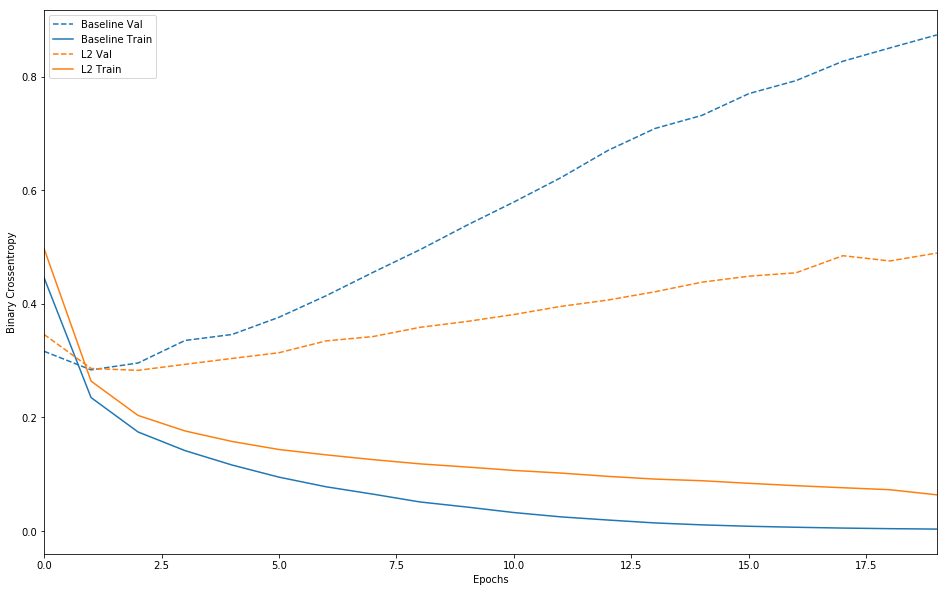

In [15]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])


In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 38s - loss: 0.6412 - accuracy: 0.6274 - binary_crossentropy: 0.6412 - val_loss: 0.5192 - val_accuracy: 0.8474 - val_binary_crossentropy: 0.5192
Epoch 2/20
25000/25000 - 34s - loss: 0.4816 - accuracy: 0.7895 - binary_crossentropy: 0.4816 - val_loss: 0.3542 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.3542
Epoch 3/20
25000/25000 - 13s - loss: 0.3664 - accuracy: 0.8595 - binary_crossentropy: 0.3664 - val_loss: 0.3006 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.3006
Epoch 4/20
25000/25000 - 10s - loss: 0.2964 - accuracy: 0.8923 - binary_crossentropy: 0.2964 - val_loss: 0.2774 - val_accuracy: 0.8880 - val_binary_crossentropy: 0.2774
Epoch 5/20
25000/25000 - 5s - loss: 0.2539 - accuracy: 0.9108 - binary_crossentropy: 0.2539 - val_loss: 0.2741 - val_accuracy: 0.8892 - val_binary_crossentropy: 0.2741
Epoch 6/20
25000/25000 - 6s - loss: 0.2220 - accuracy: 0.9235 - binary_crossentropy: 0.2220 - val_loss: 0.

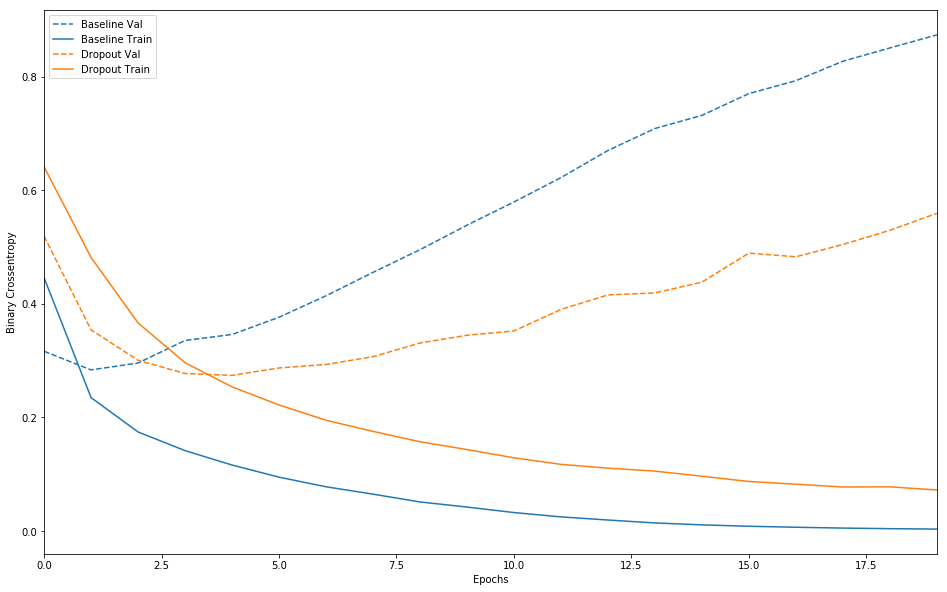

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])


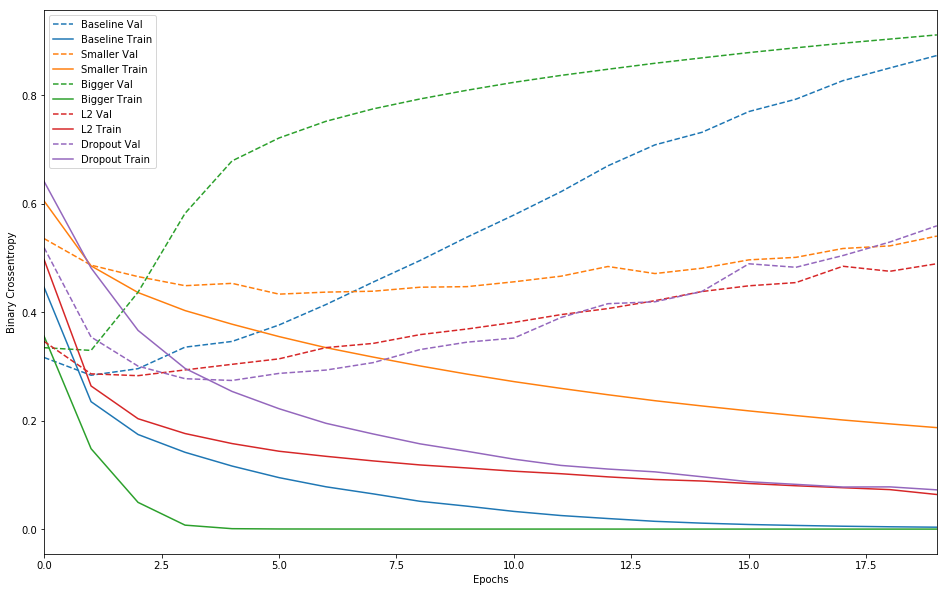

In [18]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history),
              ('l2', l2_model_history),
              ('dropout', dpt_model_history)])
